

---


## 📚 Importing libraries


---



In [14]:
# Data engineering
import pandas as pd
import numpy as np
import sklearn

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

# Data Modelling 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Data splitting
from sklearn.model_selection import train_test_split

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Metrics
from sklearn.metrics import accuracy_score

# Missing Value
import missingno as msno

# Custom functions designed for this notebook
from functions import Plot_Model_Feature_Importance, Plot_Model_Coefficient, percentage_missing_vals, outlier


In [2]:
data = pd.read_csv('autos.csv')



---


## 👀 Dataset sneak peak


---



In [3]:
data.head(3)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46




---


## 📊 Exploratory Data Analysis


---



## Data preprocessing

In [4]:
# Dropping index column as it's redundant
data = data.drop(['index'],axis=1)

# Checking the percentage of missing values sorted in ascending order
percentage_missing_vals(data)

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

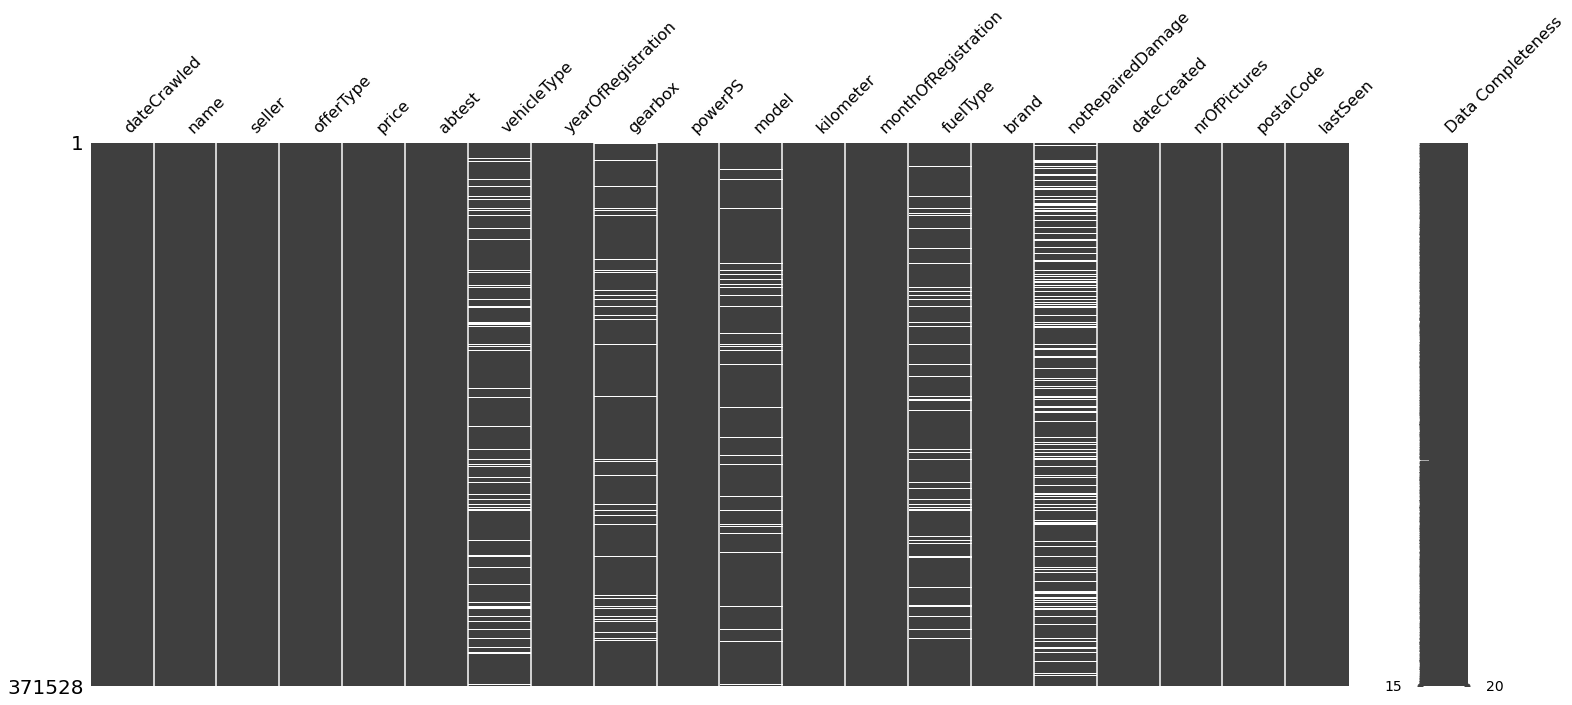

In [ ]:
# Missing Value Visualization
msno.matrix(data, labels = True)

## Dropping all null values

In [5]:
miss_cols = ["vehicleType","gearbox","model","fuelType","notRepairedDamage"]

nan_value = float("NaN")
data.dropna(subset = miss_cols, inplace=True)

## Data Visualization

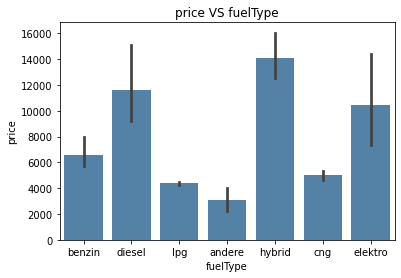

In [6]:
sns.barplot(x='fuelType', y='price', data = data, color='steelblue')
plt.title('price VS fuelType')
plt.show()

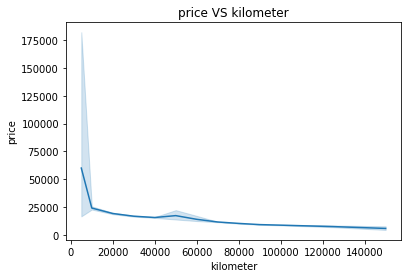

In [7]:
sns.lineplot(x='kilometer', y='price', data=data)
plt.title('price VS kilometer')
plt.show()

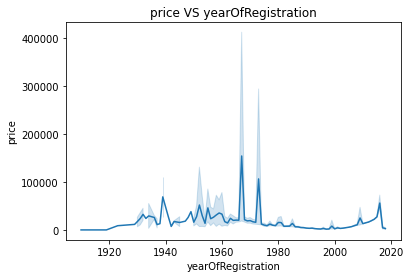

In [7]:
sns.lineplot(x='yearOfRegistration', y='price', data = data)
plt.title('price VS yearOfRegistration')
plt.show()

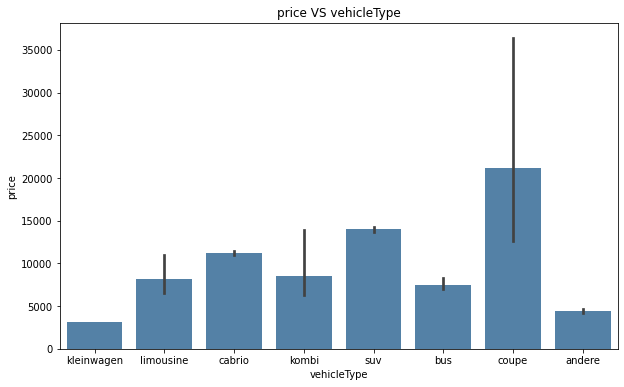

In [8]:
# vehicleTypes and their prices

plt.figure(figsize=(10, 6))
plt.title('price VS vehicleType')
sns.barplot(x='vehicleType', y='price', data = data, color='steelblue')


# show the plot
plt.show()

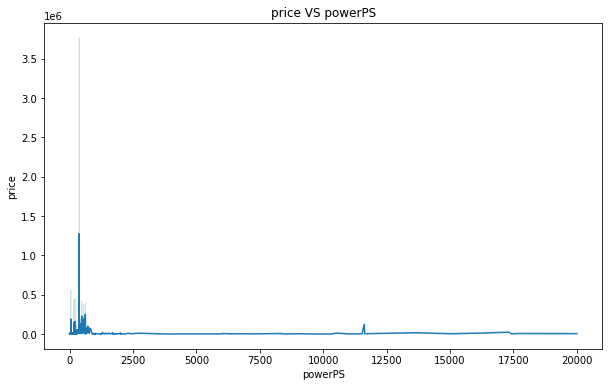

In [9]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='powerPS', y='price', data=data)
plt.title('price VS powerPS')
plt.show()

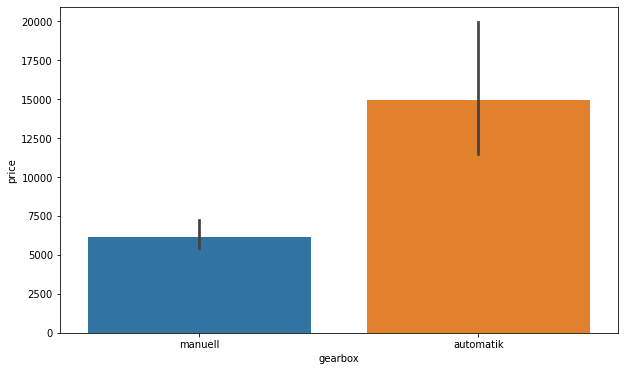

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gearbox', y='price', data=data) 

# Show the plot
plt.show()

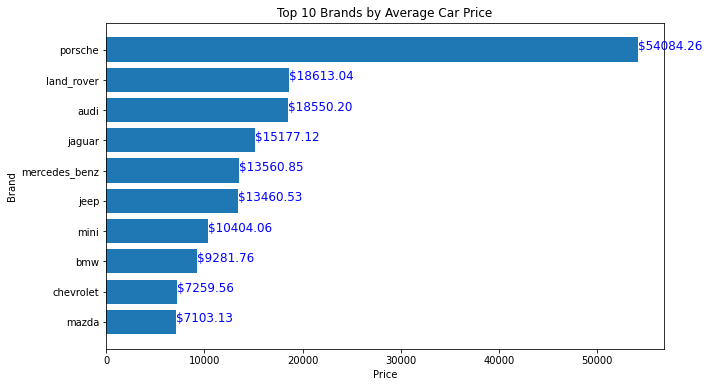

In [11]:
plt.figure(figsize=(10, 6))

# Calculate the mean price for each brand
brand_mean_prices = data.groupby('brand')['price'].mean()

# Sort the mean prices in descending order and select only the top 10 brands
sorted_mean_prices = brand_mean_prices.sort_values(ascending=True).tail(10)

# Create a horizontal bar plot of the mean prices
plt.barh(sorted_mean_prices.index, sorted_mean_prices)

for i, v in enumerate(sorted_mean_prices):
  plt.text(v, i, "${:.2f}".format(v), color='blue', fontsize=12)

# Add labels and a title to the plot
plt.title('Top 10 Brands by Average Car Price')
plt.xlabel('Price')
plt.ylabel('Brand')

# Show the plot
plt.show()

In [9]:
filter_list = ["andere"]
filter_list1 = ["coupe"]
filter_list2 = ["suv"]
filter_list3 = ["limousine"]
filter_list4 = ["bus"]
filter_list5 = ["cabrio"]
filter_list6 = ["kombi"]
filter_list7= ["kleinwagen"]
vehicle=data[data.vehicleType.isin(filter_list)]
vehicle1=data[data.vehicleType.isin(filter_list1)]
vehicle2=data[data.vehicleType.isin(filter_list2)]
vehicle3=data[data.vehicleType.isin(filter_list3)]
vehicle4=data[data.vehicleType.isin(filter_list4)]
vehicle5=data[data.vehicleType.isin(filter_list5)]
vehicle6=data[data.vehicleType.isin(filter_list6)]
vehicle7=data[data.vehicleType.isin(filter_list7)]

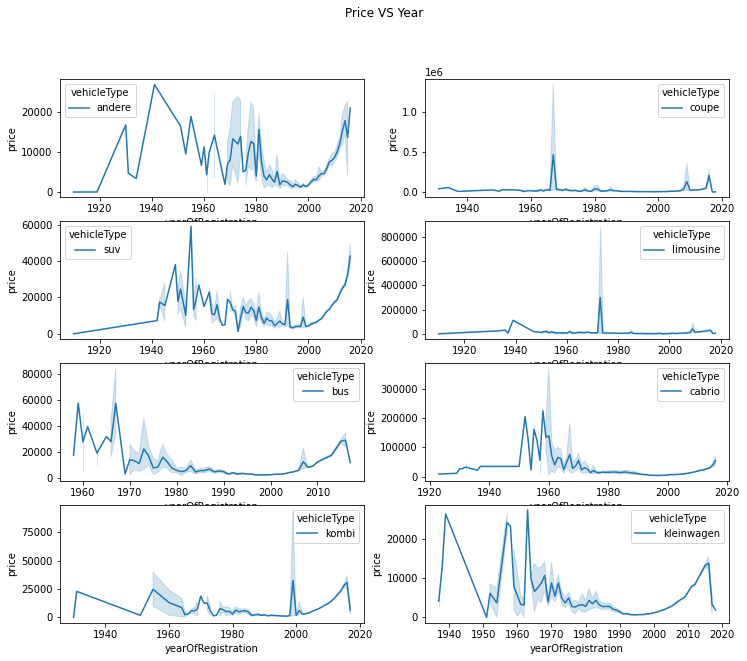

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12, 10))
fig.suptitle('Price VS Year')

# andere
sns.lineplot(ax=axes[0][0], x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle)
#coupe
sns.lineplot(ax=axes[0][1],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle1)
#suv
sns.lineplot(ax=axes[1][0],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle2)
#limousin
sns.lineplot(ax=axes[1][1],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle3)
#bus
sns.lineplot(ax=axes[2][0],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle4)
#
sns.lineplot(ax=axes[2][1],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle5)
sns.lineplot(ax=axes[3][0],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle6)
sns.lineplot(ax=axes[3][1],x="yearOfRegistration", y="price", hue='vehicleType',data=vehicle7)
plt.ticklabel_format(style='plain',axis='y')

plt.show()

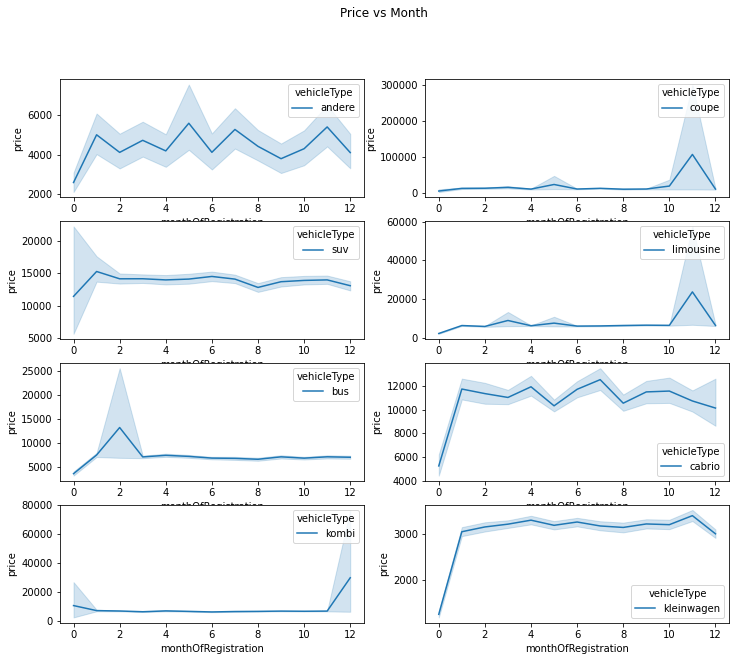

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12, 10))
fig.suptitle('Price vs Month')
plt.rcParams['axes.formatter.useoffset'] = False

# andere
sns.lineplot(ax=axes[0][0], x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle)
#coupe
sns.lineplot(ax=axes[0][1],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle1)
#suv
sns.lineplot(ax=axes[1][0],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle2)
#limousin
sns.lineplot(ax=axes[1][1],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle3)
#bus
sns.lineplot(ax=axes[2][0],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle4)
#cabrio
sns.lineplot(ax=axes[2][1],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle5)
#combi
sns.lineplot(ax=axes[3][0],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle6)
#kleinwagen
sns.lineplot(ax=axes[3][1],x="monthOfRegistration", y="price", hue='vehicleType',data=vehicle7)

plt.show()



---


## 🤖 Outlier detection and elimination


---



In [12]:
data_copy = data.copy()

In [15]:
# Setting outliers of each numeric column to Null 
for i in data_copy.select_dtypes(exclude=object).columns:
    outlier(data_copy, i) # imported from functions script

In [16]:
# Dropping the remaining null values
data_copy.dropna(inplace=True)

In [17]:
# Dropping unnecessary columns
data_copy.drop(columns=['name','dateCrawled', 
                         'dateCreated', 'nrOfPictures', 'lastSeen','model', 'postalCode', \
                        'offerType', 'seller'], inplace=True)



---

## 💿 ENCODE ALL CATEGORICAL VALUES
---

In [18]:
# Creating a copy of the data
data_copy['notRepairedDamage'] = pd.factorize(data_copy['notRepairedDamage'])[0]
data_copy['gearbox'] = pd.factorize(data_copy['gearbox'])[0]
data_copy['abtest'] = pd.factorize(data_copy['abtest'])[0]

data_copy['brand'] = pd.factorize(data_copy['brand'])[0]
data_copy['vehicleType'] = pd.factorize(data_copy['vehicleType'])[0]
data_copy['fuelType'] = pd.factorize(data_copy['fuelType'])[0]


### Checking co-relation between each column


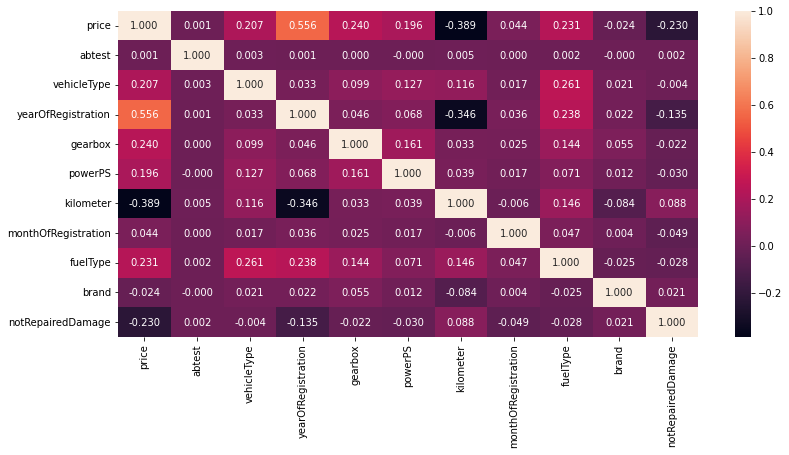

In [19]:
from seaborn import heatmap

plt.figure(figsize=(13, 6))
heatmap(data_copy.corr(), annot=True, fmt=".3f")
plt.show()

### Checking co-relation of each column with the target variable 'price'


In [20]:
# regressor those are correlated with target variable
data_copy.corr()['price'].sort_values(ascending=False)

price                  1.000000
yearOfRegistration     0.555825
gearbox                0.239570
fuelType               0.231311
vehicleType            0.206917
powerPS                0.195585
monthOfRegistration    0.044134
abtest                 0.001162
brand                 -0.024229
notRepairedDamage     -0.229954
kilometer             -0.388959
Name: price, dtype: float64

## 📈Price Modelling

In [21]:
# Forecast price
# Features
X = data_copy.drop(['price'], axis=1)

# Target
y = data_copy['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [23]:
# Data scaling 
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [25]:
dtree = DecisionTreeRegressor(criterion='squared_error', random_state=1).fit(X_train_scaled, y_train)

In [26]:
forest_reg = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=1).fit(X_train_scaled, y_train)

In [27]:
scores = {
          'dtree_reg_score': dtree.score(X_test_scaled, y_test),
          'forest_reg_score': forest_reg.score(X_test_scaled, y_test)
         }
print(scores)

{'dtree_reg_score': 0.5950077499703572, 'forest_reg_score': 0.7833661690715694}


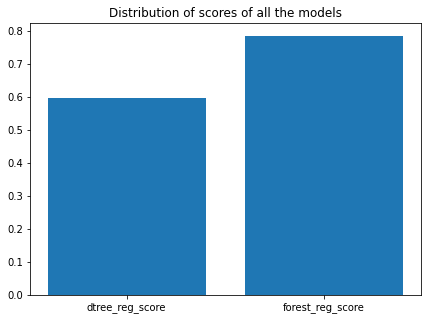

In [28]:
plt.figure(figsize=(7,5))
plt.bar(scores.keys(), scores.values())
plt.title('Distribution of scores of all the models')
plt.show()

Clearly, we can see that the **Random Forest** model achieved highest accuracy of 78% compared to other models. 

## Plotting feature importance 

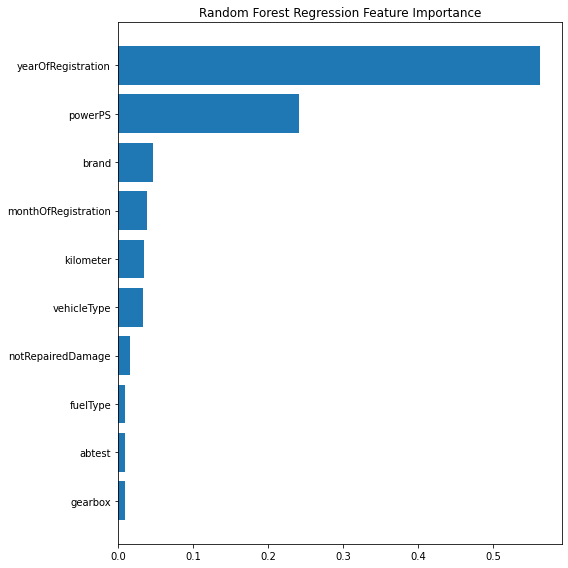

Plot Random Forest Regression Over


In [30]:
Plot_Model_Feature_Importance(forest_reg, X, 'Random Forest Regression')

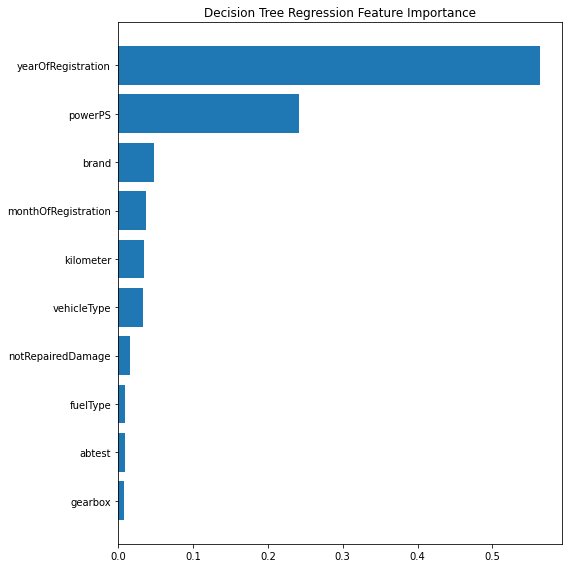

Plot Decision Tree Regression Over


In [31]:
Plot_Model_Feature_Importance(dtree, X, 'Decision Tree Regression')



---

# THANK YOU! ✨